In [23]:
import cv2
import matplotlib.pyplot as plt

In [24]:
def display_image(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

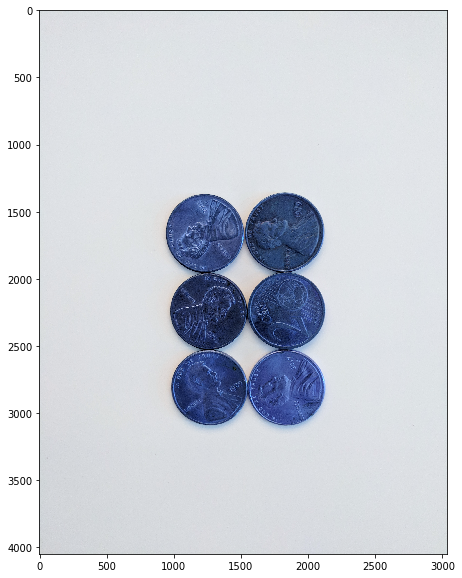

In [25]:
sep_coins = cv2.imread('../../notebooks/DATA/pennies.jpg', flags=cv2.IMREAD_COLOR)
display_image(sep_coins)

In [26]:
# APPLY MEDIAN BLUR.
# CONVERT TO GRAYSCALE.
# APPLY BINARY THRESHOLD.
# FIND THE CONTOURS.

In [27]:
# APPLY MEDIAN BLUR.
sep_blur = cv2.medianBlur(src=sep_coins, ksize=25)

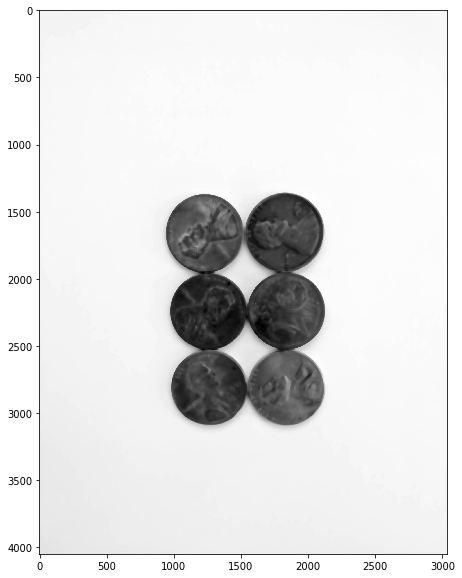

In [28]:
# CONVERT TO GRAYSCALE.
gray_sep_coins = cv2.cvtColor(src=sep_blur, code=cv2.COLOR_BGR2GRAY)
display_image(gray_sep_coins)

# Delete the 'sep_blur' to save memory.
del sep_blur

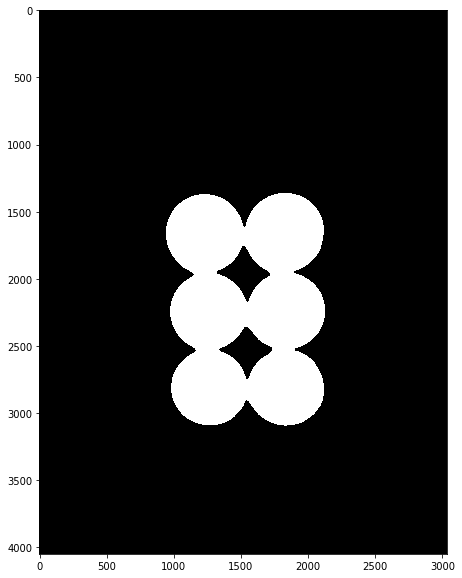

In [29]:
# APPLY BINARY THRESHOLD.
_, threshold = cv2.threshold(src=gray_sep_coins,
                             thresh=160,
                             maxval=255,
                             type=cv2.THRESH_BINARY_INV)

display_image(threshold)

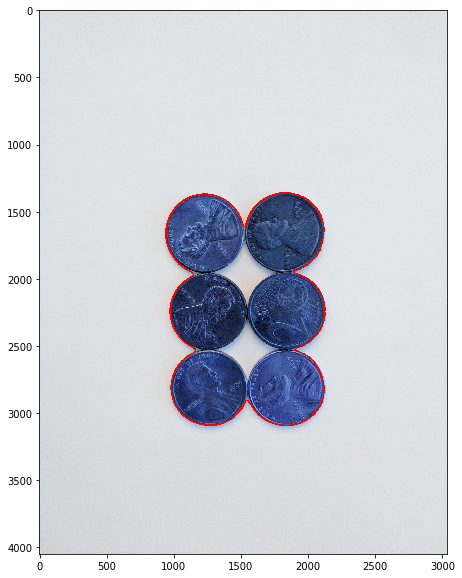

In [30]:
# FIND THE CONTOURS.
image, contours, hierarchy = cv2.findContours(image=threshold.copy(),
                                              mode=cv2.RETR_CCOMP,
                                              method=cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image=sep_coins,
                         contours=contours,
                         contourIdx=i,
                         color=(255, 0, 0),
                         thickness=10)

display_image(sep_coins)